In [1]:
!pip install torch numpy

In [2]:
!pip install mediapipe opencv-python torch 

In [3]:
!pip install --upgrade mediapipe opencv-python protobuf

  Using cached protobuf-5.27.1-cp310-abi3-win_amd64.whl.metadata (592 bytes)


Documentation for models in [MediaPipe](https://ai.google.dev/edge/mediapipe/solutions/guide?hl=ru):

In [4]:
# imports

import cv2 # import opencv to the notebook
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils # variable for drawing utils and pose visualization
mp_pose = mp.solutions.pose # variable for pose estimation models (face detection, face mesh, iris, hands, pose, ...)

# Base-Line code

Video Feed (basic part of code which whill be edited later for specific tasks):

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read() # reads the current feed from the webcam 
    cv2.imshowq('MediaPipe Feed', frame) # creates a pop-up on a screen to visualize the particular image from the webcam
    
    if cv2.waitKey(10) & 0xFF == ord('q'): # if we try to hit 'q' or close the screen it kills off the loop
        break

cap.release()
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'imshowq'

In [6]:
import cv2
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
print(ret, frame)
cap.release()


False None


* ```cap = cv2.VideoCapture(0)``` - string to set up video capture device. Number in draws shows the specific number of the device to capture the video

* ```ret, frame = cap.read()``` - reads the current feed from the webcam. 
Here `ret` just the value we're going to use and 
`frame` actually gives us the image from the webcam

* ```if cv2.waitKey(10) & 0xFF == ord('q'):``` - if we try to hit $q$ or close the screen it kills off the loop. 
Here `0xFF` is checking the button which we hit, 

# Make Detections

In [7]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        
        # Recolour the image (reorder it in RGB)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # make our image not available to write, it allows to save lots of memory
        
        # Make a detection
        results = pose.process(image) # save poses to the variable results
        
        # Recolour the image back to BGR
        image.flags.writeable = True # available for writing
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # back to BGR
        
        # Render detections
        mp_drawing.draw_landmarks(image, 
                                  # landmark_list:
                                  results.pose_landmarks, 
                                  # connections:
                                  mp_pose.POSE_CONNECTIONS,
                                  # landmark_drawing_spec:
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), # the colour for different dots
                                  # connection_drawing_spec:
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) # the colour for different lines between dots
                                  )
        
        cv2.imshow('MediaPipe Feed', image)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


 ```with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:``` - 
* `min_detection_confidence` - what we want detection confidence to be, 
* `min_tracking_confidence` - maintaining a state

So, the higher value is, the more accurate model will be. But with high level detections model won't recognize a state if it does not recognize a perfect body.

Let's display all pose landmarks, coordinates for all landmarks. It represents each individual point which represents a part of estimation model

In [8]:
??results.pose_landmarks

Object `results.pose_landmarks` not found.


In [9]:
??mp_pose.POSE_CONNECTIONS

Type:        frozenset
String form: frozenset({(15, 21), (16, 20), (18, 20), (3, 7), (14, 16), (23, 25), (28, 30), (11, 23), (27, 31), (6, 8), (15, 17), (24, 26), (16, 22), (4, 5), (5, 6), (29, 31), (12, 24), (23, 24), (0, 1), (9, 10), (1, 2), (0, 4), (11, 13), (30, 32), (28, 32), (15, 19), (16, 18), (25, 27), (26, 28), (12, 14), (17, 19), (2, 3), (11, 12), (27, 29), (13, 15)})
Length:      35
Docstring:  
frozenset() -> empty frozenset object
frozenset(iterable) -> frozenset object

Build an immutable unordered collection of unique elements.

In [10]:
??mp_drawing.DrawingSpec

Init signature:
mp_drawing.DrawingSpec(
    color: Tuple[int, int, int] = (224, 224, 224),
    thickness: int = 2,
    circle_radius: int = 2,
) -> None
Docstring:      DrawingSpec(color: Tuple[int, int, int] = (224, 224, 224), thickness: int = 2, circle_radius: int = 2)
Source:        
@dataclasses.dataclass
class DrawingSpec:
  # Color for drawing the annotation. Default to the white color.
  color: Tuple[int, int, int] = WHITE_COLOR
  # Thickness for drawing the annotation. Default to 2 pixels.
  thickness: int = 2
  # Circle radius. Default to 2 pixels.
  circle_radius: int = 2
File:           d:\users\legion\bia technologies\yolo_8_test\.venv\lib\site-packages\mediapipe\python\solutions\drawing_utils.py
Type:           type
Subclasses:     

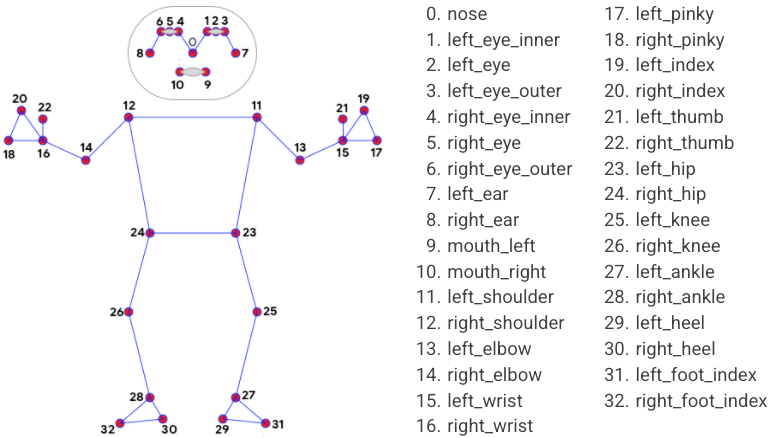

In [11]:
from IPython.display import Image, display

# Замените путь на путь к вашему локальному изображению
local_image_path = 'data/images/dots.png'

display(Image(filename=local_image_path, width=300, height=300))

# Determining Joints

This code is similar to the previous one sell above but with try exception part to determine landmarks

In [12]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        
        # Recolour the image (reorder it in RGB)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # make our image not available to write, it allows to save lots of memory
        
        # Make a detection
        results = pose.process(image) # save poses to the variable results
        
        # Recolour the image back to BGR
        image.flags.writeable = True # available for writing
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # back to BGR
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark # new variable code landmarks
            print(landmarks)
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, 
                                  # landmark_list:
                                  results.pose_landmarks, 
                                  # connections:
                                  mp_pose.POSE_CONNECTIONS,
                                  # landmark_drawing_spec:
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), # the colour for different dots
                                  # connection_drawing_spec:
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) # the colour for different lines between dots
                                  )
        
        cv2.imshow('MediaPipe Feed', image)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [10]:
len(landmarks) # amount of landmarks = 33, cause 33 points for the body

33

In [11]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [12]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].visibility # a

0.997735321521759

In [13]:
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value] # b

x: 1.08810925
y: 1.35525274
z: -0.400404304
visibility: 0.0411310494

In [14]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value] # c

x: 1.03484952
y: 1.71123874
z: -1.02235401
visibility: 0.0136450101

In [15]:
mp_pose.PoseLandmark.NOSE.value

0

As we can see the number is similar to those one on the picture, so all works correct

# Calculate Angles

In [16]:
def calculate_angle(a,b,c): # points of triangle
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians * 180 / np.pi)
    
    if angle > 180.0:
        angle = 360.0 - angle
    
    return angle

In [17]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [18]:
shoulder, elbow, wrist

([0.9698230624198914, 0.8845575451850891],
 [1.0881092548370361, 1.355252742767334],
 [1.0348495244979858, 1.7112387418746948])

In [19]:
calculate_angle(shoulder,elbow,wrist)

np.float64(157.38460351004278)

In [20]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # experimental cause it changes left coordinated to right and vice versa
        frame = cv2.flip(frame, 1) # display horizontally
        
        # Detect stuff and render
        
        # Recolour the image (reorder it in RGB)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # make our image not available to write, it allows to save lots of memory
        
        # Make a detection
        results = pose.process(image) # save poses to the variable results
        
        # Recolour the image back to BGR
        image.flags.writeable = True # available for writing
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # back to BGR
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark # new variable code landmarks
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder,elbow,wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                        tuple(np.multiply(elbow, [640,480]).astype(int)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                        )
            
            print(landmarks)
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, 
                                  # landmark_list:
                                  results.pose_landmarks, 
                                  # connections:
                                  mp_pose.POSE_CONNECTIONS,
                                  # landmark_drawing_spec:
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), # the colour for different dots
                                  # connection_drawing_spec:
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) # the colour for different lines between dots
                                  )
        
        cv2.imshow('MediaPipe Feed', image)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

[x: 0.311919749
y: 0.499557227
z: -1.15561628
visibility: 0.999857783
, x: 0.347463131
y: 0.425912499
z: -1.08670485
visibility: 0.999655247
, x: 0.365903
y: 0.427370548
z: -1.0866611
visibility: 0.999753535
, x: 0.386339694
y: 0.428782
z: -1.08715856
visibility: 0.999651909
, x: 0.278237432
y: 0.425003409
z: -1.08493423
visibility: 0.99959594
, x: 0.253817141
y: 0.424531579
z: -1.08397186
visibility: 0.999712527
, x: 0.234360904
y: 0.425532222
z: -1.0843581
visibility: 0.999601424
, x: 0.42071858
y: 0.459949851
z: -0.619459212
visibility: 0.999670386
, x: 0.208227083
y: 0.454037309
z: -0.592776477
visibility: 0.999678612
, x: 0.352757841
y: 0.569013357
z: -0.977580428
visibility: 0.999837875
, x: 0.269251227
y: 0.57809186
z: -0.970986485
visibility: 0.999813735
, x: 0.583040953
y: 0.822239757
z: -0.323581666
visibility: 0.998999655
, x: 0.0582843721
y: 0.86399579
z: -0.36604771
visibility: 0.99907577
, x: 0.710847735
y: 1.27661836
z: -0.226986796
visibility: 0.159735024
, x: -0.043142

In [21]:
import cv2

# Открытие веб-камеры
cap = cv2.VideoCapture(0)

# Получение ширины и высоты кадра
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

print(f"Разрешение веб-камеры: {int(width)} x {int(height)}")

# Освобождение ресурса
cap.release()


Разрешение веб-камеры: 640 x 480


In [22]:
np.multiply(elbow, [640,480]) # normalising coordinates and processing to make them available to the size of the integrated web camera

array([448.87359619, 529.4288063 ])

In [23]:
tuple(np.multiply(elbow, [640,480]).astype(int))

(np.int64(448), np.int64(529))

# For local video

In [24]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize mediapipe pose class
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

# Path to video
video_path = './data/videos/24.06.2024/имя_видео_файла.mp4'
cap = cv2.VideoCapture(video_path)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break

        # Поворот изображения по горизонтали
        frame = cv2.flip(frame, 1)

        # Recolour the image (reorder it in RGB)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False  # make our image not available to write, it allows to save lots of memory

        # Make a detection
        results = pose.process(image)  # save poses to the variable results

        # Recolour the image back to BGR
        image.flags.writeable = True  # available for writing
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # back to BGR

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark  # new variable code landmarks

            # Get image width
            image_width = image.shape[1]

            # Get coordinates and flip the x-coordinates
            shoulder = [image_width - landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * image_width,
                        landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * image.shape[0]]
            elbow = [image_width - landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x * image_width,
                     landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y * image.shape[0]]
            wrist = [image_width - landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x * image_width,
                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y * image.shape[0]]

            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)

            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [1, 1]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                        )

            print(landmarks)
        except:
            pass

        # Render detections
        mp_drawing.draw_landmarks(image,
                                  # landmark_list:
                                  results.pose_landmarks,
                                  # connections:
                                  mp_pose.POSE_CONNECTIONS,
                                  # landmark_drawing_spec:
                                  mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),  # the colour for different dots
                                  # connection_drawing_spec:
                                  mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)  # the colour for different lines between dots
                                  )

        cv2.imshow('MediaPipe Feed', image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [51]:
import cv2
import mediapipe as mp
import numpy as np
import os

# Initialize mediapipe pose class
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

# Get the video name from the user
video_name = input("Enter the video name (without .mp4): ")

# Specify the paths
video_path = f'./data/videos/input/{video_name}.mp4'
output_path = f'./data/videos/output/{video_name}_output.mp4'

# Check if output directory exists, if not, create it
os.makedirs('./data/videos/output/', exist_ok=True)

cap = cv2.VideoCapture(video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=2) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break

        # Flip the image horizontally
        frame = cv2.flip(frame, 1)

        # Recolour the image (reorder it in RGB)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False  # make our image not available to write, it allows to save lots of memory

        # Make a detection
        results = pose.process(image)  # save poses to the variable results

        # Recolour the image back to BGR
        image.flags.writeable = True  # available for writing
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # back to BGR

        # Extract landmarks
        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            # Get image width
            image_width = image.shape[1]

            # Get coordinates and flip the x-coordinates
            shoulder = [image_width - landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * image_width,
                        landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * image.shape[0]]
            elbow = [image_width - landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x * image_width,
                     landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y * image.shape[0]]
            wrist = [image_width - landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x * image_width,
                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y * image.shape[0]]

            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)

            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [1, 1]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                        )

            print(landmarks)

            # Render detections
            mp_drawing.draw_landmarks(image,
                                      results.pose_landmarks,
                                      mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),  # the colour for different dots
                                      mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)  # the colour for different lines between dots
                                      )

        # Write the processed frame to the output video
        out.write(image)

        cv2.imshow('MediaPipe Feed', image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()


D:\Users\Legion\BIA Technologies\YOLO_8_test\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


[x: 0.866294324
y: 0.688274503
z: -0.153168738
visibility: 0.985092938
, x: 0.859665096
y: 0.690381944
z: -0.1557336
visibility: 0.982120812
, x: 0.861242
y: 0.687413275
z: -0.155922621
visibility: 0.980634212
, x: 0.860328257
y: 0.685317457
z: -0.155906975
visibility: 0.983696282
, x: 0.860963
y: 0.697270215
z: -0.156130835
visibility: 0.985622227
, x: 0.861357152
y: 0.70034945
z: -0.156348944
visibility: 0.988135338
, x: 0.861459374
y: 0.703865
z: -0.156470552
visibility: 0.990818679
, x: 0.860460579
y: 0.688218296
z: -0.137184754
visibility: 0.983992398
, x: 0.862498164
y: 0.710299134
z: -0.139570057
visibility: 0.976466954
, x: 0.871634901
y: 0.681775093
z: -0.141179
visibility: 0.950635791
, x: 0.86831063
y: 0.688695371
z: -0.143237174
visibility: 0.964261711
, x: 0.877315938
y: 0.67327255
z: -0.123357281
visibility: 0.997540116
, x: 0.876146317
y: 0.719299614
z: -0.104932658
visibility: 0.997592628
, x: 0.895863712
y: 0.683732808
z: -0.115214176
visibility: 0.42825374
, x: 0.8689

# Test both YOLOv8 and MediaPipe

In [26]:
!pip install --upgrade numpy
!pip install --upgrade mediapipe opencv-python protobuf
!pip install torch numpy

  Using cached protobuf-5.27.1-cp310-abi3-win_amd64.whl.metadata (592 bytes)


In [40]:
import numpy
print(numpy.__version__)

2.0.0


In [50]:
import cv2
import mediapipe as mp
import numpy as np
import os
from ultralytics import YOLO

# Инициализация MediaPipe Pose
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Инициализация YOLOv8
yolo_model = YOLO('yolov8n.pt')

def calculate_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)
    
    if angle > 180.0:
        angle = 360 - angle
    
    return angle

video_name = input("Введите название видео (без .mp4): ")

video_path = f'./data/videos/input/{video_name}.mp4'
output_path = f'./data/videos/output/{video_name}_output.mp4'

os.makedirs('./data/videos/output/', exist_ok=True)

cap = cv2.VideoCapture(video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=2) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break

        # Обнаружение людей с помощью YOLOv8
        results = yolo_model(frame, classes=[0])  # 0 - класс "person"
        
        for r in results:
            boxes = r.boxes
            
            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                
                # Вырезаем область с человеком
                person_img = frame[y1:y2, x1:x2]
                
                # Применяем MediaPipe Pose к вырезанной области
                rgb_img = cv2.cvtColor(person_img, cv2.COLOR_BGR2RGB)
                results_pose = pose.process(rgb_img)
                
                if results_pose.pose_landmarks:
                    # Рисуем скелет
                    mp_drawing.draw_landmarks(
                        person_img,
                        results_pose.pose_landmarks,
                        mp_pose.POSE_CONNECTIONS,
                        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                    )
                    
                    landmarks = results_pose.pose_landmarks.landmark
                    h, w, _ = person_img.shape
                    
                    # Обработка левой руки
                    left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * w,
                                     landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * h]
                    left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x * w,
                                  landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y * h]
                    left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x * w,
                                  landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y * h]
                    
                    left_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
                    
                    cv2.putText(person_img, f"L: {left_angle:.1f}", 
                                tuple(np.multiply(left_elbow, [1, 1]).astype(int)),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                    
                    # Обработка правой руки
                    right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * w,
                                      landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * h]
                    right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x * w,
                                   landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y * h]
                    right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x * w,
                                   landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y * h]
                    
                    right_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
                    
                    cv2.putText(person_img, f"R: {right_angle:.1f}", 
                                tuple(np.multiply(right_elbow, [1, 1]).astype(int)),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                
                # Вставляем обработанное изображение человека обратно в кадр
                frame[y1:y2, x1:x2] = person_img
                
                # Рисуем рамку вокруг человека
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        out.write(frame)
        
        cv2.imshow('YOLOv8 + MediaPipe Pose', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
out.release()
cv2.destroyAllWindows()

RuntimeError: Numpy is not available

In [46]:
import cv2
import torch
from ultralytics import YOLO

# Функция для обработки видео с использованием YOLOv8 на GPU
def process_video(input_path, output_path):
    # Загрузите модель YOLOv8 на GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = YOLO("yolov8n.pt").to(device)  # Убедитесь, что у вас правильный путь к модели

    # Откройте видео
    cap = cv2.VideoCapture(input_path)
    
    # Получите свойства видео
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Настройте видеозапись
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Кодек для записи
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Переводим кадр в формат, подходящий для YOLOv8
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_tensor = torch.from_numpy(frame / 255.0).unsqueeze(0).permute(0, 3, 1, 2).float().to(device)

        # Обработка кадра с помощью модели YOLOv8
        results = model(frame_tensor)

        # Отрисовка результатов на кадре
        for result in results.xyxy[0].cpu().numpy():
            x1, y1, x2, y2, conf, cls = result
            label = f'{model.names[int(cls)]} {conf:.2f}'
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Сохраните обработанный кадр
        out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

    # Закрытие всех ресурсов
    cap.release()
    out.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    import os

    video_name = input("Введите название видео без расширения: ")
    input_path = os.path.join('./data/videos/input', f'{video_name}.mp4')
    output_path = os.path.join('./data/videos/output', f'{video_name}_output.mp4')

    if not os.path.exists(input_path):
        print(f"Видео {input_path} не найдено.")
    else:
        process_video(input_path, output_path)
        print(f"Видео сохранено в {output_path}.")


RuntimeError: Numpy is not available

In [43]:
import numpy as np
val = np.asarray([1, 2, 3])
print(val)

[1 2 3]


In [44]:
print(type(val))

<class 'numpy.ndarray'>
